# Trabajo 2, Pace Antonio

# Preprocesado del conjunto de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset is a classification problem with multioutput (7 possible output labels). The goal is to predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems and satellite images.
The first column (Motorway) is not used for the calculations.

In [3]:
dataset = pd.read_csv("dataset.csv",skipinitialspace=True, sep=';',index_col=0)
col_types = dataset.columns[1:].tolist()

In [4]:
X_names = dataset.iloc[0,1:-7]
y_names = dataset.iloc[0,-7:]

The dataset columns are the type of the values (numerical, categorical or label) and the first row is the name of the columns. So for having just the values in the dataset:

In [5]:
dataset = pd.DataFrame(dataset.iloc[1:,1:].values, columns=dataset.iloc[0].values[1:])

## • Análisis del conjunto de datos:

In [6]:
missing_values = dataset.isnull().sum()
missing_values

SR                    0
NR                    0
TR                    0
VR                    0
SUR1                  0
SUR2                  0
SUR3                  0
UR                    0
FR                    0
OR                    0
RR                    0
BR                    0
MR                    0
CR                    0
Green frogs           0
Brown frogs           0
Common toad           0
Fire-bellied toad     0
Tree frog             0
Common newt           0
Great crested newt    0
dtype: int64

In the dataset there is no missing value.

In [7]:
X = dataset.iloc[:,:-7] # values
Y = dataset.iloc[:,-7:] # labels

In the original dataset, column type is provided. We can see that 10 features are categorical, 3 numerical and 2 ordinal.

In [8]:
col_types

['Numerical',
 'Numerical.1',
 'Categorical.1',
 'Categorical.2',
 'Categorical.3',
 'Categorical.4',
 'Categorical.5',
 'Categorical.6',
 'Categorical.7',
 'Numerical.2',
 'Ordinal',
 'Ordinal.1',
 'Categorical.8',
 'Categorical.9',
 'Label 1',
 'Label 2',
 'Label 3',
 'Label 4',
 'Label 5',
 'Label 6',
 'Label 7']

In [9]:
col_types_df = pd.DataFrame({'type': col_types})
num_col = [i for i, tipo in enumerate(col_types) if tipo.startswith('Numerical')]
num_col_names = X.columns[num_col]

Since also categorical values are already encoded, i just cast all values to float.

In [10]:
X = X.astype(float)
Y = Y.astype(float)

Dataset stats included mean and standard deviation, only for numerical values.

In [11]:
X[num_col_names].describe()

SR          NR          OR
count     189.000000  189.000000  189.000000
mean     9633.227513    1.566138   89.962963
std     46256.078309    1.544419   19.904926
min        30.000000    1.000000   25.000000
25%       300.000000    1.000000   99.000000
50%       700.000000    1.000000  100.000000
75%      3300.000000    1.000000  100.000000
max    500000.000000   12.000000  100.000000

Median only for numerical values

In [12]:
X[num_col_names].median()

SR    700.0
NR      1.0
OR    100.0
dtype: float64

Mode also for categorical values

In [13]:
X.mode()

SR   NR   TR   VR  SUR1  SUR2  SUR3   UR   FR     OR   RR   BR   MR   CR
0  300.0  1.0  1.0  1.0   2.0  10.0   6.0  0.0  0.0  100.0  1.0  1.0  0.0  1.0

Classification values are 7 categories and it represent which amphibian you can find in that area. Obviously more than one categories can be true. The dataset values for classification is already one-hot encoded.

In [14]:
Y

Green frogs  Brown frogs  Common toad  Fire-bellied toad  Tree frog  \
0            0.0          0.0          0.0                0.0        0.0   
1            0.0          1.0          1.0                0.0        0.0   
2            0.0          1.0          1.0                0.0        0.0   
3            0.0          0.0          1.0                0.0        0.0   
4            0.0          1.0          1.0                1.0        0.0   
..           ...          ...          ...                ...        ...   
184          0.0          1.0          0.0                0.0        0.0   
185          1.0          1.0          1.0                1.0        0.0   
186          1.0          1.0          1.0                1.0        0.0   
187          0.0          1.0          1.0                0.0        0.0   
188          0.0          1.0          1.0                0.0        0.0   

     Common newt  Great crested newt  
0            0.0                 0.0  
1            1.0                 0.0  
2            1.0                 0.0  
3            0.0                 0.0  
4            1.0                 1.0  
..           ...                 ...  
184          0.0                 0.0  
185          1.0                 0.0  
186          1.0                 0.0  
187          0.0                 0.0  
188          0.0                 0.0  

[189 rows x 7 columns]

## • Incorporación de la modificación de características a las versiones del conjunto de datos.

We can scale the numerical data using StandardScaler and ColumnTransformer. Then we can obtain X_values and y_values np matrix.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(transformers=[("scaler",StandardScaler(),num_col)],remainder='passthrough')
X_values = ct.fit_transform(X)
y_values = Y.values

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

There is no need for one-hot encoding or label encoding since the values are already numerical.

## • Incorporación de la reducción del número de características a las versiones del conjunto de datos.

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_values,y_values)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [17]:
selector.get_support()

array([ True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False])

In [18]:
X_names[selector.get_support()]

Numerical          SR
Categorical.2      VR
Categorical.3    SUR1
Categorical.4    SUR2
Categorical.5    SUR3
Categorical.6      UR
Ordinal            RR
Ordinal.1          BR
Name: ID, dtype: object

SelectFromModel selects 8 features between the initial 14.

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_values.shape[1])

pca.fit(X_values)

X_pca = pca.transform(X_values)

In [20]:
pca.explained_variance_

array([3.36809283e+01, 1.45701914e+01, 1.17689570e+01, 1.13763233e+01,
       8.18147326e+00, 3.36375322e+00, 1.54912772e+00, 1.31888364e+00,
       7.83306497e-01, 7.05369229e-01, 3.36474168e-01, 2.58517918e-01,
       8.43229328e-02, 1.40690493e-02])

With PCA, looking at the eigenvalues of the components, we can see that in fact the first 8 are more important than the others.
We can select 8 features with RFE:

In [21]:
from sklearn.feature_selection import RFE

rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=8)
rfe.fit(X_values,y_values)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)

In [22]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False])

In [23]:
X_names[rfe.support_]

Numerical          SR
Categorical.2      VR
Categorical.3    SUR1
Categorical.4    SUR2
Categorical.5    SUR3
Categorical.6      UR
Ordinal            RR
Ordinal.1          BR
Name: ID, dtype: object

Those 8 variables are the same selected with SelectFromModel.

In [24]:
X_values_red = X_values[:,rfe.support_.tolist()]

In [25]:
np.sum(y_values,axis=0)

array([108., 148., 124.,  58.,  71.,  58.,  21.])

## Incorporación de la modificación del conjunto de ejemplos a las versiones del conjunto de datos.

In [26]:
from imblearn.over_sampling import RandomOverSampler

# Crea un istanza di RandomOverSampler
# ros = RandomOverSampler(random_state=42)

# Applica il resampling al tuo dataset
# X_resampled, y_resampled = ros.fit_resample(X_values_red, y_values)

In [27]:
from sklearn.utils import resample

X_resampled, y_resampled = resample(X_values_red, y_values, n_samples=int(X_values_red.shape[0]*1.5), random_state=42)

RandomOverSampler doesn't support multioutput targets, so i just use resample that duplicates rows.
I tried without resampling but the instances were too low and results were awful. Using resampling like this, we have some overfitting (because we duplicate rows) but better results

# Construcción de modelos de decisión

Since the dataset is small and it's multi-output (there are 7 output labels, so a lot of possible output combination and too few examples) the predictions won't be very precise. I will use an ensemble of classifiers, one for each output category, measuring the accuracy of the prediction for each one of them and taking the average.

## • Aprendizaje basado en instancias:

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = 0.3,
                   random_state=42)

In [29]:
def ensemble_classifiers(Classifier,params,X_train,y_train):
    classifiers = []
    for i in range(y_train.shape[1]):
        classifier = Classifier(**params)
        classifier.fit(X_train, y_train[:, i])
        classifiers.append(classifier)
    return classifiers

In [30]:
from sklearn.metrics import accuracy_score

def ensemble_accuracy(y_test,predictions):
    accuracy = [accuracy_score(y_test[:,i],predictions[:,i]) for i in range(y_test.shape[1])]
    return np.mean(accuracy)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

classifiers_knn = ensemble_classifiers(KNeighborsClassifier,{"n_neighbors":10,"p":2},X_train,y_train)
predictions_knn = np.column_stack([classifier.predict(X_test) for classifier in classifiers_knn])
ensemble_accuracy(y_test,predictions_knn)

0.6974789915966387

With n=10 accuracy is very low, let's try to reduce the number of neighbors since we don't have too many examples.

In [33]:
classifiers_knn = ensemble_classifiers(KNeighborsClassifier,{"n_neighbors":3,"p":2},X_train,y_train)
predictions_knn = np.column_stack([classifier.predict(X_test) for classifier in classifiers_knn])
ensemble_accuracy(y_test,predictions_knn)

0.7899159663865545

Much better results.

In [34]:
predictions_knn = np.column_stack([classifier.predict(X_train) for classifier in classifiers_knn])
ensemble_accuracy(y_train,predictions_knn)

0.9227994227994226

And not too much overfitting.

## • Árboles de decisión:

In [35]:
from sklearn.tree import DecisionTreeClassifier

classifiers_tree = ensemble_classifiers(DecisionTreeClassifier,{},X_train,y_train)
predictions_tree = np.column_stack([classifier.predict(X_test) for classifier in classifiers_tree])

In [36]:
ensemble_accuracy(y_test,predictions_tree)

0.8571428571428571

In [37]:
predictions_tree = np.column_stack([classifier.predict(X_train) for classifier in classifiers_tree])
ensemble_accuracy(y_train,predictions_tree)

1.0

We have good result on test set but 100% on training set, so we can reduce the overfitting  with pre pruning.

In [39]:
best_depth = 0
best_score = 0
best_crit = ""
best_impurity = 0
best_samples = 0
impurities = [0,0.001,0.01,0.1]
samples = [2, 5, 10, 20]
for i in range(1,10):
    for crit in ['entropy','gini']:
        for impurity in impurities:
            for min_sample in samples:
                classifiers_tree = ensemble_classifiers(DecisionTreeClassifier, {"criterion": crit, "max_depth": i, "min_samples_split": min_sample, "min_impurity_decrease": impurity}, X_train, y_train)
                predictions_tree = np.column_stack([classifier.predict(X_test) for classifier in classifiers_tree])
                score = ensemble_accuracy(y_test,predictions_tree)
                if score > best_score:
                    best_score = score
                    best_depth = i
                    best_crit = crit
                    best_samples = min_sample
                    best_impurity = impurity
print("Best depth:", best_depth, " - Best criterion:", best_crit, " - Best min_samples_split:", best_samples, " - Best min_impurity_decrease:", best_impurity, " - Score:", best_score)

Best depth: 9  - Best criterion: entropy  - Best min_samples_split: 2  - Best min_impurity_decrease: 0.001  - Score: 0.8722689075630251


We build now the tree with the best parameters

In [40]:
classifiers_tree = ensemble_classifiers(DecisionTreeClassifier,{"criterion":best_crit,"max_depth":best_depth,"min_samples_split":best_samples,"min_impurity_decrease":best_impurity},X_train,y_train)
predictions_tree = np.column_stack([classifier.predict(X_test) for classifier in classifiers_tree])

In [41]:
from sklearn.tree import export_graphviz

export_graphviz(
    classifiers_tree[3],
    out_file="amph_tree1.dot",
    feature_names=X_names.iloc[rfe.support_],
    rounded=True,
    filled=True)

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:291: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature = self.feature_names[tree.feature[node_id]]


In [42]:
!dot -Tpng amph_tree1.dot -o amph_tree1.png

<Figure size 640x480 with 0 Axes>

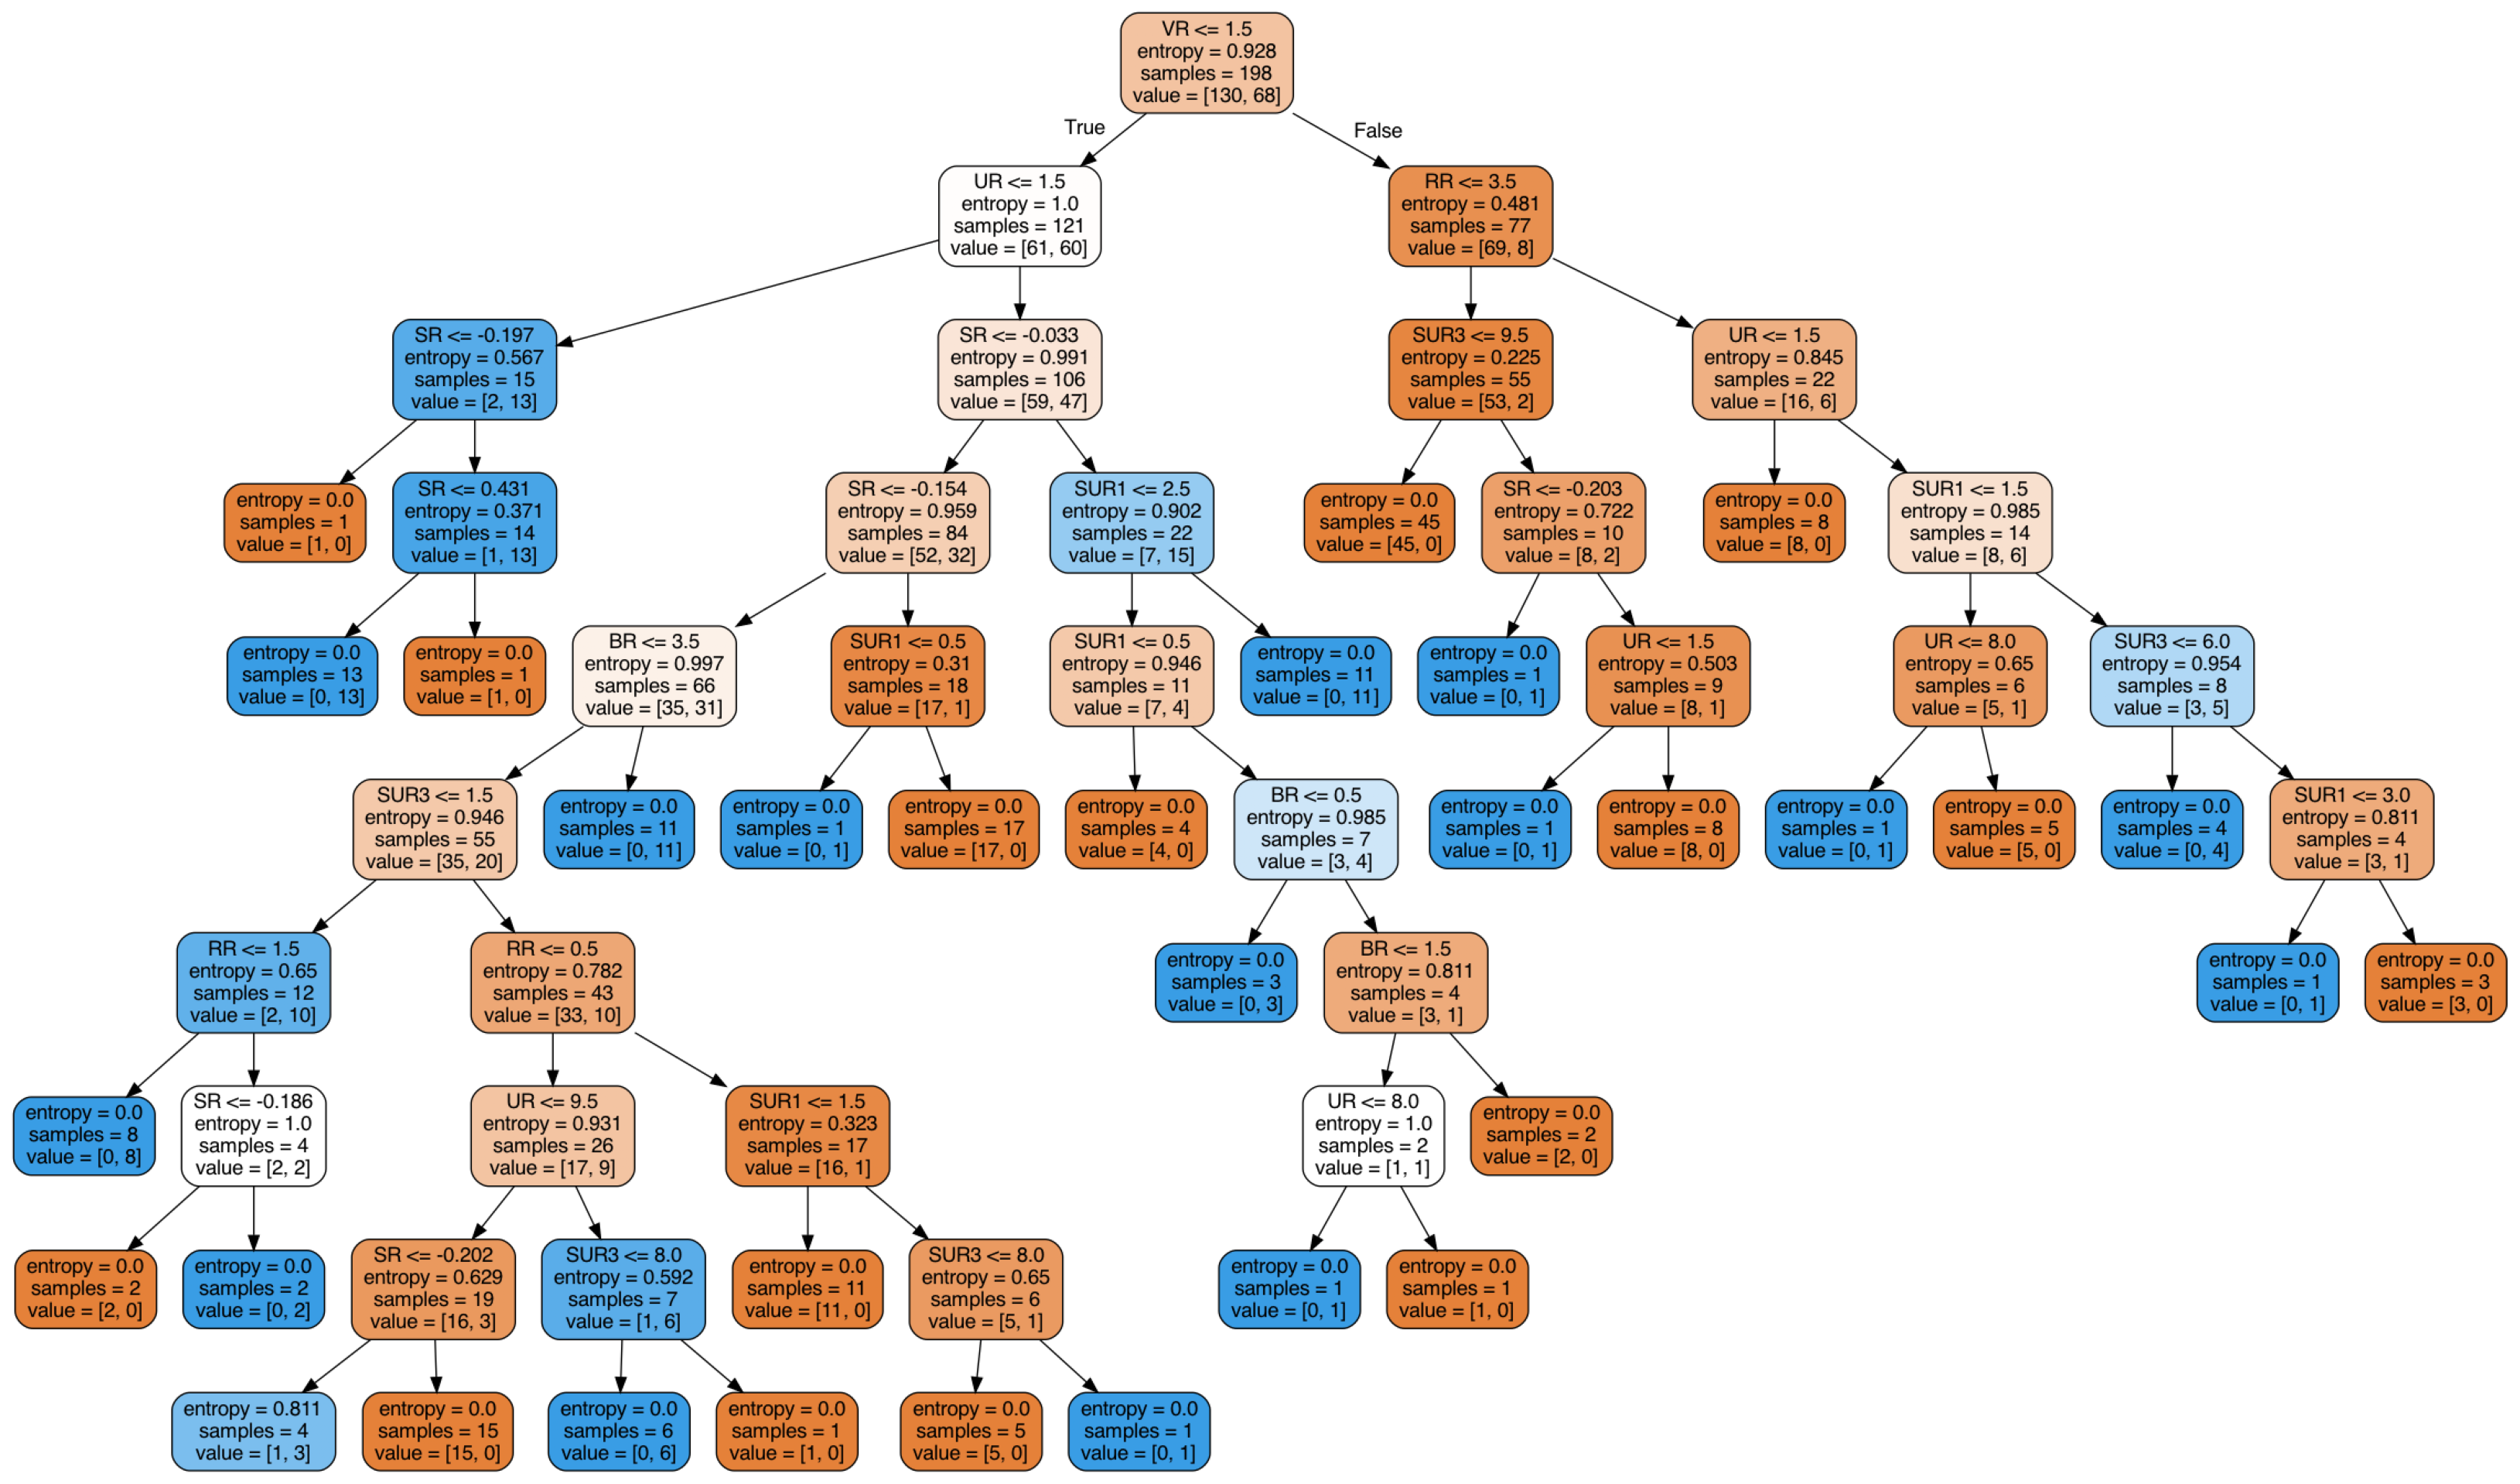

In [43]:
plt.clf()
image = plt.imread("amph_tree1.png")
height, width, depth = image.shape
dpi = 70
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
plt.axis('off')
plt.imshow(image)
plt.show()

Checking overfitting

In [44]:
predictions_tree = np.column_stack([classifier.predict(X_train) for classifier in classifiers_tree])
ensemble_accuracy(y_train,predictions_tree)

0.9769119769119771

## • Ensemble learning con árboles:

In [45]:
classifiers_rf = ensemble_classifiers(RandomForestClassifier,{"n_estimators":5,"random_state":42},X_train,y_train)
predictions_rf = np.column_stack([classifier.predict(X_test) for classifier in classifiers_rf])
ensemble_accuracy(y_test, predictions_rf)

0.86890756302521

In [46]:
predictions_rf = np.column_stack([classifier.predict(X_train) for classifier in classifiers_rf])
ensemble_accuracy(y_train, predictions_rf)

0.987012987012987

We have same accuracy of the decision trees and some overhead. Let's try to fine tuning the Random Forest.

In [47]:
best_depth2 = 0
best_score = 0
best_estimator = 0
estimators = [4,8,16]
for i in range(1,10):
    for estimator in estimators:
        classifiers_tree = ensemble_classifiers(RandomForestClassifier, {"n_estimators":estimator,"random_state":42,"max_depth":i}, X_train, y_train)
        predictions_tree = np.column_stack([classifier.predict(X_test) for classifier in classifiers_tree])
        score = ensemble_accuracy(y_test,predictions_tree)
        if score > best_score:
            best_score = score
            best_depth2 = i
            best_estimator = estimator
print("Best depth:", best_depth2, " - Best n_estimator:", best_estimator, " - Score:", best_score)

Best depth: 7  - Best n_estimator: 8  - Score: 0.86890756302521


In [48]:
classifiers_rf = ensemble_classifiers(RandomForestClassifier,{"n_estimators":best_estimator,"random_state":42,"max_depth":best_depth2},X_train,y_train)
predictions_rf = np.column_stack([classifier.predict(X_test) for classifier in classifiers_rf])
ensemble_accuracy(y_test, predictions_rf)

0.86890756302521

In [49]:
predictions_rf = np.column_stack([classifier.predict(X_train) for classifier in classifiers_rf])
ensemble_accuracy(y_train, predictions_rf)

0.9733044733044733

Better accuracy and slightly less overfitting now.
We do the same thing with GradientBoosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

best_depth3 = 0
best_score = 0
best_estimator = 0
estimators = [4,8,16]
for i in range(1,10):
    for estimator in estimators:
        classifiers_gb = ensemble_classifiers(GradientBoostingClassifier, {"n_estimators":estimator,"random_state":42,"max_depth":i}, X_train, y_train)
        predictions_gb = np.column_stack([classifier.predict(X_test) for classifier in classifiers_gb])
        score = ensemble_accuracy(y_test,predictions_gb)
        if score > best_score:
            best_score = score
            best_depth3 = i
            best_estimator = estimator
print("Best depth:", best_depth3, " - Best n_estimator:", best_estimator, " - Score:", best_score)

Best depth: 9  - Best n_estimator: 16  - Score: 0.8806722689075629


In [52]:
classifiers_gb = ensemble_classifiers(GradientBoostingClassifier,{"n_estimators":best_estimator,"random_state":42,"max_depth":best_depth3},X_train,y_train)
predictions_gb = np.column_stack([classifier.predict(X_train) for classifier in classifiers_gb])
ensemble_accuracy(y_train, predictions_gb)

1.0

Still too much overfitting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

classifiers_gb = ensemble_classifiers(GradientBoostingClassifier,{"n_estimators":best_estimator,"random_state":42,"max_depth":4},X_train,y_train)
predictions_gb = np.column_stack([classifier.predict(X_test) for classifier in classifiers_gb])
ensemble_accuracy(y_test, predictions_gb)

0.838655462184874

In [54]:
predictions_gb = np.column_stack([classifier.predict(X_train) for classifier in classifiers_gb])
ensemble_accuracy(y_train, predictions_gb)

0.9451659451659452

Reducing the max_depth we reduce the overfitting.

## • Modelos lineales:

In [55]:
from sklearn.linear_model import LogisticRegression

classifiers_log = ensemble_classifiers(LogisticRegression,{},X_train,y_train)
predictions_log = np.column_stack([classifier.predict(X_test) for classifier in classifiers_log])
ensemble_accuracy(y_test, predictions_log)

0.7075630252100841

In [56]:
predictions_log = np.column_stack([classifier.predict(X_train) for classifier in classifiers_log])
ensemble_accuracy(y_train, predictions_log)

0.7655122655122655

In [57]:
best_C = 0
C_values = [0.001,0.01,0.1,1,10,100]
best_score = 0
for C in C_values:
    classifiers_log = ensemble_classifiers(LogisticRegression, {"C":C}, X_train, y_train)
    predictions_log = np.column_stack([classifier.predict(X_test) for classifier in classifiers_log])
    score = ensemble_accuracy(y_test,predictions_log)
    if score > best_score:
        best_score = score
        best_C = C
print("Best C:", best_C," - Score:", best_score)

Best C: 10  - Score: 0.7142857142857144


In [58]:
classifiers_log = ensemble_classifiers(LogisticRegression, {"C":best_C}, X_train, y_train)
predictions_log = np.column_stack([classifier.predict(X_train) for classifier in classifiers_log])
ensemble_accuracy(y_train, predictions_log)

0.7633477633477634

No overfitting and overall worst accuracy compared to the previous models.

In [59]:
from sklearn.svm import SVC

gamma_values = [0.001,0.01,0.1,1,10]
best_gamma = 0
best_C2 = 0
best_score = 0
for C in C_values:
    for gamma in gamma_values:
        classifiers_svc = ensemble_classifiers(SVC, {"C":C,'gamma':gamma}, X_train, y_train)
        predictions_svc = np.column_stack([classifier.predict(X_test) for classifier in classifiers_svc])
        score = ensemble_accuracy(y_test,predictions_svc)
        if score > best_score:
            best_score = score
            best_C2 = C
            best_gamma = gamma
print("Best C:", best_C2," - Best gamma: ",best_gamma," - Score:", best_score)

Best C: 1  - Best gamma:  1  - Score: 0.8957983193277311


In [60]:
classifiers_svc = ensemble_classifiers(SVC, {"C":best_C2,'gamma':best_gamma}, X_train, y_train)
predictions_svc = np.column_stack([classifier.predict(X_train) for classifier in classifiers_svc])
ensemble_accuracy(y_train,predictions_svc)

1.0

Trying with SVC with different possible values of C and gamma, we got better results compared to the LogisticRegressor but 100% accuracy on the train set. We try to reduce overfitting reducing C.

In [61]:
classifiers_svc = ensemble_classifiers(SVC, {"C":0.6,'gamma':best_gamma}, X_train, y_train)
predictions_svc = np.column_stack([classifier.predict(X_test) for classifier in classifiers_svc])
ensemble_accuracy(y_test,predictions_svc)

0.8806722689075629

In [62]:
predictions_svc = np.column_stack([classifier.predict(X_train) for classifier in classifiers_svc])
ensemble_accuracy(y_train,predictions_svc)

0.9819624819624818

In [63]:
best_C2=0.6

## • Redes neuronales:

In [65]:
from sklearn.neural_network import MLPClassifier

classifiers_nn = ensemble_classifiers(MLPClassifier, {"solver":'lbfgs','alpha':0.001,"hidden_layer_sizes":[16,16],"max_iter":1000,"random_state":8}, X_train, y_train)
predictions_nn = np.column_stack([classifier.predict(X_test) for classifier in classifiers_nn])
ensemble_accuracy(y_test,predictions_nn)

0.8722689075630251

In [66]:
predictions_nn = np.column_stack([classifier.predict(X_train) for classifier in classifiers_nn])
ensemble_accuracy(y_train,predictions_nn)

0.9971139971139972

In [67]:
classifiers_nn = ensemble_classifiers(MLPClassifier, {"solver":'lbfgs','alpha':1,"hidden_layer_sizes":[16,16],"max_iter":1000,"random_state":8}, X_train, y_train)
predictions_nn = np.column_stack([classifier.predict(X_test) for classifier in classifiers_nn])
ensemble_accuracy(y_test,predictions_nn)

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

0.8739495798319327

In [68]:
predictions_nn = np.column_stack([classifier.predict(X_train) for classifier in classifiers_nn])
ensemble_accuracy(y_train,predictions_nn)

0.9971139971139971

In [69]:
classifiers_nn = ensemble_classifiers(MLPClassifier, {"solver":'lbfgs','alpha':1.5,"hidden_layer_sizes":[64],"max_iter":1000,"random_state":8}, X_train, y_train)
predictions_nn = np.column_stack([classifier.predict(X_test) for classifier in classifiers_nn])
ensemble_accuracy(y_test,predictions_nn)

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

0.8638655462184873

In [70]:
predictions_nn = np.column_stack([classifier.predict(X_train) for classifier in classifiers_nn])
ensemble_accuracy(y_train,predictions_nn)

0.979076479076479

Changing regularization factor alpha and number of hidden layers we can reduce a bit the overfitting. With NN we still have quite good results.

With *keras*, we have to build and train a NN for each category output. We don't use ensemble_classifier function because with keras it's a bit different.

In [71]:
def ensemble_accuracy_nn(models,X_test,y_test):
    accuracy = 0
    for i in range(y_train.shape[1]):
        _, acc = models[i].evaluate(X_test,y_test[:,i])
        accuracy += acc
    accuracy = accuracy / y_train.shape[1]
    return accuracy

In [72]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

models = []
for i in range(y_train.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation="relu",input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["acc"])
    model.fit(X_train,y_train[:,i],epochs=50,batch_size=16,verbose=0)
    models.append(model)


2024-01-23 13:26:08.809527: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [73]:
ensemble_accuracy_nn(models,X_test,y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.2995 - acc: 0.8824


0.7478991746902466

In [74]:
ensemble_accuracy_nn(models,X_train,y_train)

7/7 [==============================] - 0s 547us/step - loss: 0.2850 - acc: 0.8788


0.8347763419151306

Since we don't have overfitting, we try to add a layer and to increase the number of epochs. Also we can try using rmsprop as optimizer

In [75]:
models = []
for i in range(y_train.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation="relu",input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(16, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])
    model.fit(X_train,y_train[:,i],epochs=100,batch_size=16,verbose=0)
    models.append(model)

In [76]:
ensemble_accuracy_nn(models,X_test,y_test)

3/3 [==============================] - 0s 937us/step - loss: 0.1580 - acc: 0.9529


0.8453781604766846

Still accuracy is too low, we can increase the number of perceptrons.

In [77]:
from keras.regularizers import l2

models = []
for i in range(y_train.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100, activation="relu",kernel_regularizer=l2(0.001),input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(25, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["acc"])
    model.fit(X_train,y_train[:,i],epochs=100,batch_size=16,verbose=0)
    models.append(model)

In [78]:
ensemble_accuracy_nn(models,X_test,y_test)

3/3 [==============================] - 0s 968us/step - loss: 0.1836 - acc: 0.9294


0.8352941274642944

In [79]:
ensemble_accuracy_nn(models,X_train,y_train)

7/7 [==============================] - 0s 571us/step - loss: 0.0316 - acc: 1.0000


0.9639249699456351

I added a l2 regularization term for mitigate a bit the overfitting. Still the accuracy is a bit lower than other methods.

# Evaluación de modelos

## • Cross validation

I use a modified form of the cross_validation method used in the Trabajo 1. The only difference is that it calls the ensemble_classifiers and ensemble_accuracy methods.

In [80]:
def rendimiento_validacion_cruzada(clase_clasificador, params, X, y, n=5, epochs=1000):
    m = X.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    fold_size = m // n

    accuracies = []

    for i in range(n):
        start = i * fold_size
        end = (i + 1) * fold_size if i < n - 1 else m

        val_indices = indices[start:end]
        X_val = X[val_indices]
        y_val = y[val_indices]

        train_indices = np.concatenate([indices[:start], indices[end:]])
        X_train = X[train_indices]
        y_train = y[train_indices]
        
        classifiers = ensemble_classifiers(clase_clasificador,params,X,y)
        predictions = np.column_stack([classifier.predict(X_test) for classifier in classifiers])
        accuracy = ensemble_accuracy(y_test,predictions)
        
        accuracies.append(accuracy)

    mean_accuracy = np.mean(accuracies)

    return mean_accuracy

Cross validation accuracy with KNN:

In [81]:
cross_val_acc_knn = rendimiento_validacion_cruzada(KNeighborsClassifier,{"n_neighbors":3,"p":2},X_train,y_train)
cross_val_acc_knn

0.7899159663865545

Cross validation accuracy with SVC:

In [82]:
cross_val_acc_svc = rendimiento_validacion_cruzada(SVC,{"C":best_C2,'gamma':best_gamma},X_train,y_train)
cross_val_acc_svc

0.8806722689075629

Cross validation accuracy with Decision Tree:

In [83]:
cross_val_acc_tree = rendimiento_validacion_cruzada(DecisionTreeClassifier,{"criterion":best_crit,"max_depth":best_depth,"min_samples_split":best_samples,"min_impurity_decrease":best_impurity},X_train,y_train)
cross_val_acc_tree

0.86890756302521

Cross validation accuracy with Logistic Regresion:

In [84]:
cross_val_acc_log = rendimiento_validacion_cruzada(LogisticRegression, {"C":best_C},X_train,y_train)
cross_val_acc_log

0.7142857142857144

Cross validation accuracy with NN:

In [85]:
cross_val_acc_nn = rendimiento_validacion_cruzada(MLPClassifier, {"solver":'lbfgs','alpha':1.5,"hidden_layer_sizes":[64],"max_iter":1000,"random_state":8},X_train,y_train)
cross_val_acc_nn

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed t

0.8638655462184873

## • Evaluación del rendimiento:

show_metrics print the confusion matrix and the classification report for a model. I took this function from my model evaluation exercise for this course, making some changes for this project. Given the nature of the problem it's needed a multilabel confusion matrix, that prints a matrix for each category treating each one as a binary problem.

In [86]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report, make_scorer

def show_metrics(classifiers, X_train, y_train, X_test, y_test, model_name):
    print(f"{'='*40} {model_name} {'='*40}")
    
    predictions_test = np.column_stack([classifier.predict(X_test) for classifier in classifiers])
    predictions_train = np.column_stack([classifier.predict(X_train) for classifier in classifiers])

    train_conf_matrix = multilabel_confusion_matrix(y_train,predictions_train)
    test_conf_matrix = multilabel_confusion_matrix(y_test, predictions_test)
    print("Confusion Matrix (training):\n", train_conf_matrix)
    print("Confusion Matrix (test):\n", test_conf_matrix)

    train_report = classification_report(y_train, predictions_train)
    test_report = classification_report(y_test, predictions_test)
    print("Classification Report (training):\n", train_report)
    print("Classification Report (test):\n", test_report)

In [87]:
show_metrics(classifiers_knn,X_train,y_train,X_test,y_test,'KNN')

======================================== KNN ========================================
Confusion Matrix (training):
 [[[ 79  10]
  [ 10  99]]

 [[ 29   8]
  [  2 159]]

 [[ 57  10]
  [  6 125]]

 [[121   9]
  [ 10  58]]

 [[117  10]
  [  8  63]]

 [[123   9]
  [  6  60]]

 [[163   5]
  [  4  26]]]
Confusion Matrix (test):
 [[[28 12]
  [ 7 38]]

 [[ 8  7]
  [ 4 66]]

 [[17 13]
  [ 6 49]]

 [[47 10]
  [ 9 19]]

 [[42 15]
  [ 8 20]]

 [[41 14]
  [ 8 22]]

 [[66  9]
  [ 3  7]]]
Classification Report (training):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       109
           1       0.95      0.99      0.97       161
           2       0.93      0.95      0.94       131
           3       0.87      0.85      0.86        68
           4       0.86      0.89      0.88        71
           5       0.87      0.91      0.89        66
           6       0.84      0.87      0.85        30

   micro avg       0.91      0.93      0.92       636

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace

In [88]:
show_metrics(classifiers_tree,X_train,y_train,X_test,y_test,'Decision Tree')

======================================== Decision Tree ========================================
Confusion Matrix (training):
 [[[ 87   2]
  [  2 107]]

 [[ 36   1]
  [  0 161]]

 [[ 67   0]
  [  0 131]]

 [[130   0]
  [  4  64]]

 [[127   0]
  [  0  71]]

 [[130   2]
  [  1  65]]

 [[168   0]
  [  0  30]]]
Confusion Matrix (test):
 [[[33  7]
  [ 6 39]]

 [[ 9  6]
  [ 3 67]]

 [[22  8]
  [10 45]]

 [[55  2]
  [ 6 22]]

 [[50  7]
  [ 9 19]]

 [[50  5]
  [ 9 21]]

 [[75  0]
  [ 1  9]]]
Classification Report (training):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.99      1.00      1.00       161
           2       1.00      1.00      1.00       131
           3       1.00      0.94      0.97        68
           4       1.00      1.00      1.00        71
           5       0.97      0.98      0.98        66
           6       1.00      1.00      1.00        30

   micro avg       0.99      0.99      0.99

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace

In [89]:
show_metrics(classifiers_log,X_train,y_train,X_test,y_test,'Logistic Regression')

======================================== Logistic Regression ========================================
Confusion Matrix (training):
 [[[ 52  37]
  [ 15  94]]

 [[  4  33]
  [  0 161]]

 [[ 37  30]
  [ 11 120]]

 [[109  21]
  [ 42  26]]

 [[110  17]
  [ 57  14]]

 [[111  21]
  [ 22  44]]

 [[167   1]
  [ 21   9]]]
Confusion Matrix (test):
 [[[26 14]
  [ 8 37]]

 [[ 1 14]
  [ 0 70]]

 [[ 9 21]
  [11 44]]

 [[49  8]
  [15 13]]

 [[46 11]
  [23  5]]

 [[38 17]
  [19 11]]

 [[75  0]
  [ 9  1]]]
Classification Report (training):
               precision    recall  f1-score   support

           0       0.72      0.86      0.78       109
           1       0.83      1.00      0.91       161
           2       0.80      0.92      0.85       131
           3       0.55      0.38      0.45        68
           4       0.45      0.20      0.27        71
           5       0.68      0.67      0.67        66
           6       0.90      0.30      0.45        30

   micro avg       0.75      0.74    

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace

In [90]:
show_metrics(classifiers_svc,X_train,y_train,X_test,y_test,'SVC')

======================================== SVC ========================================
Confusion Matrix (training):
 [[[ 89   0]
  [  0 109]]

 [[ 22  15]
  [  0 161]]

 [[ 66   1]
  [  0 131]]

 [[130   0]
  [  1  67]]

 [[127   0]
  [  0  71]]

 [[132   0]
  [  2  64]]

 [[168   0]
  [  6  24]]]
Confusion Matrix (test):
 [[[27 13]
  [ 0 45]]

 [[ 3 12]
  [ 0 70]]

 [[18 12]
  [ 0 55]]

 [[57  0]
  [ 8 20]]

 [[57  0]
  [13 15]]

 [[55  0]
  [10 20]]

 [[75  0]
  [ 3  7]]]
Classification Report (training):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       0.91      1.00      0.96       161
           2       0.99      1.00      1.00       131
           3       1.00      0.99      0.99        68
           4       1.00      1.00      1.00        71
           5       1.00      0.97      0.98        66
           6       1.00      0.80      0.89        30

   micro avg       0.98      0.99      0.98       636

/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace

In [91]:
show_metrics(classifiers_nn,X_train,y_train,X_test,y_test,'NN')

======================================== NN ========================================
Confusion Matrix (training):
 [[[ 85   4]
  [  0 109]]

 [[ 34   3]
  [  0 161]]

 [[ 65   2]
  [  1 130]]

 [[127   3]
  [  2  66]]

 [[122   5]
  [  1  70]]

 [[129   3]
  [  3  63]]

 [[167   1]
  [  1  29]]]
Confusion Matrix (test):
 [[[32  8]
  [ 6 39]]

 [[ 9  6]
  [ 3 67]]

 [[22  8]
  [ 8 47]]

 [[49  8]
  [ 4 24]]

 [[49  8]
  [ 8 20]]

 [[49  6]
  [ 4 26]]

 [[73  2]
  [ 2  8]]]
Classification Report (training):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       109
           1       0.98      1.00      0.99       161
           2       0.98      0.99      0.99       131
           3       0.96      0.97      0.96        68
           4       0.93      0.99      0.96        71
           5       0.95      0.95      0.95        66
           6       0.97      0.97      0.97        30

   micro avg       0.97      0.99      0.98       636


/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antoniopace

## • Curvas de rendimiento:

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr_curves(classifiers, X_test, y_test, label):
    
    predictions_test = np.column_stack([classifier.predict(X_test) for classifier in classifiers])
    
    for i in range(y_train.shape[1]):
        fpr, tpr, _ = roc_curve(y_test[:, i], predictions_test[:, i])
        roc_auc = auc(fpr, tpr)

        precision, recall, _ = precision_recall_curve(y_test[:, i], predictions_test[:, i])
        average_precision = average_precision_score(y_test[:, i], predictions_test[:, i])
        
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f'{label} - Class {i} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label=f'{label} - Class {i} (AP = {average_precision:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall (PR) Curve')
        plt.legend()

    plt.show()

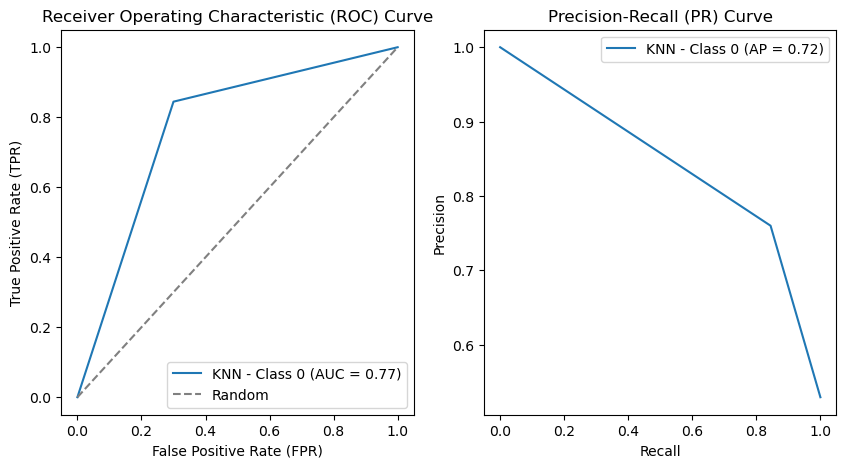

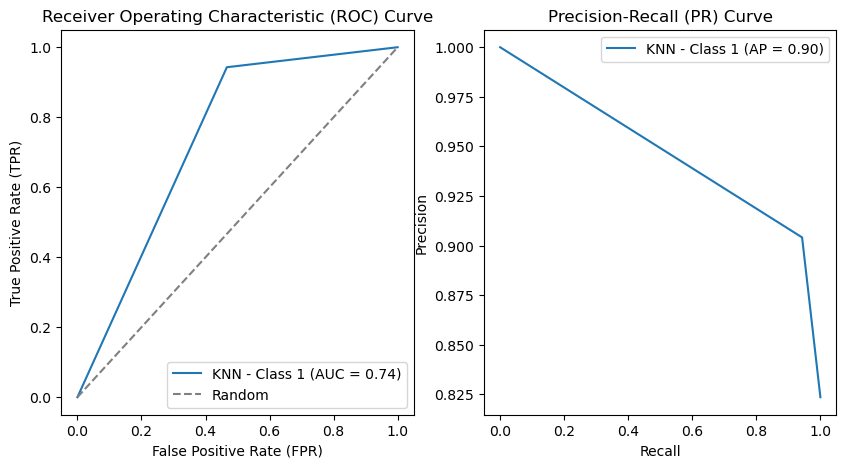

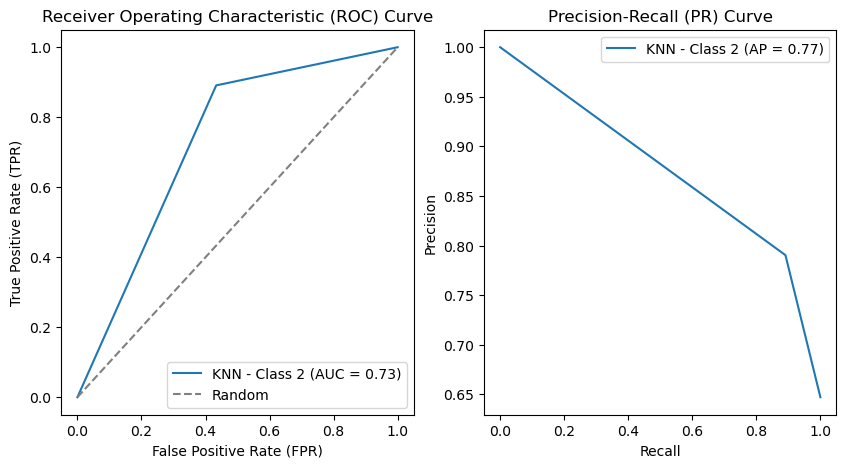

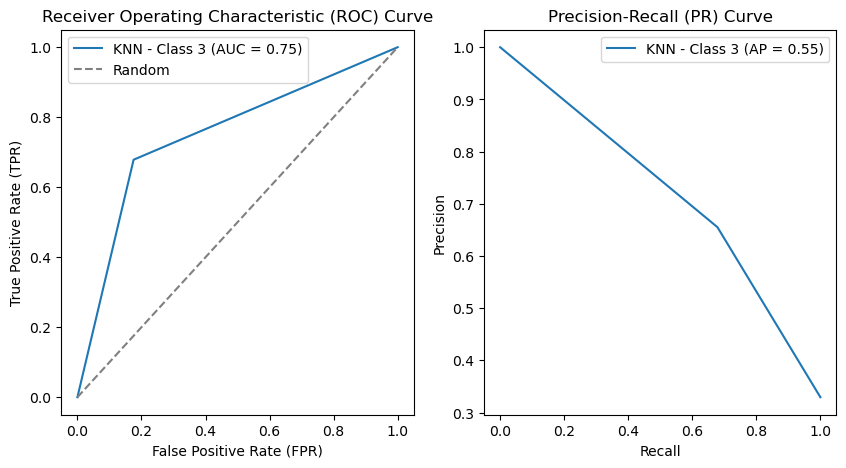

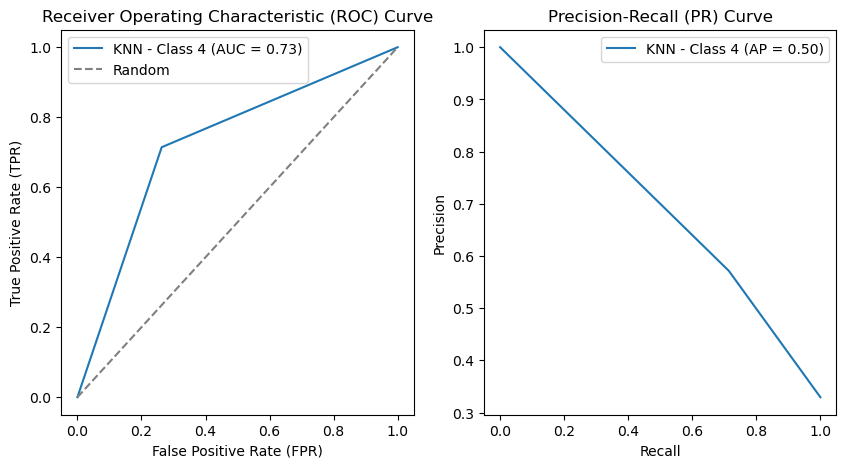

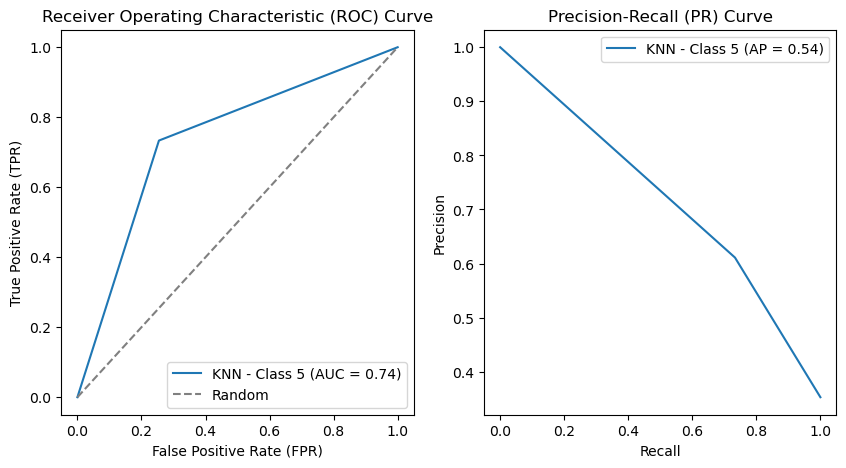

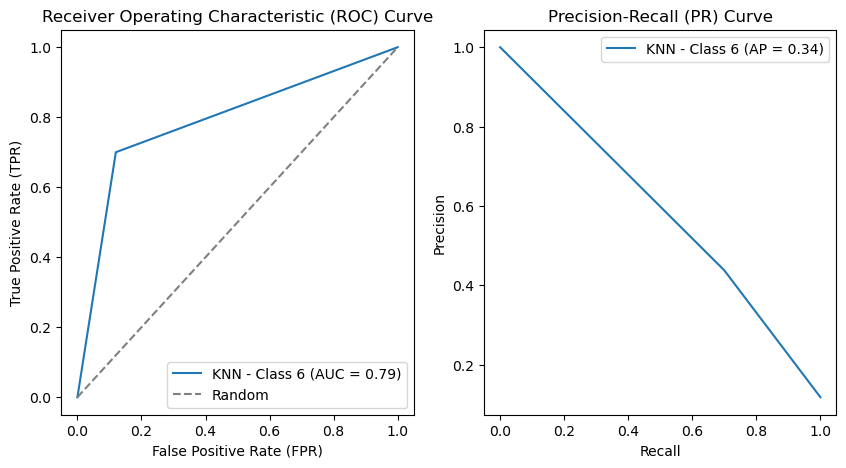

In [93]:
plot_roc_pr_curves(classifiers_knn, X_test, y_test, 'KNN')

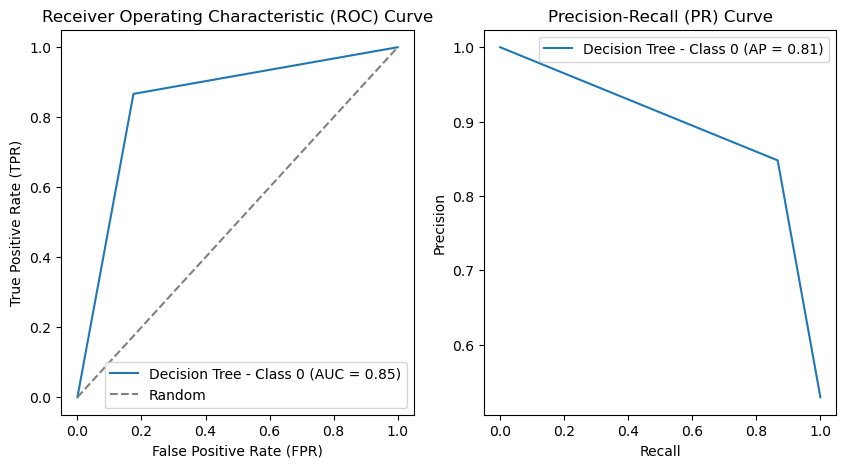

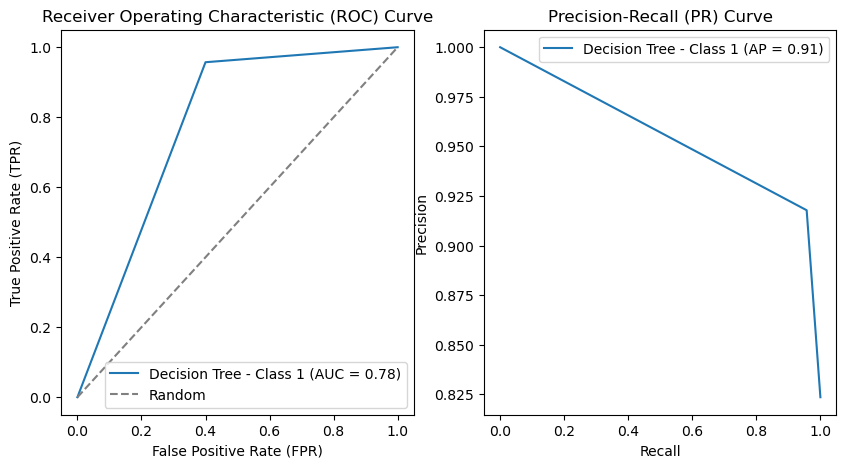

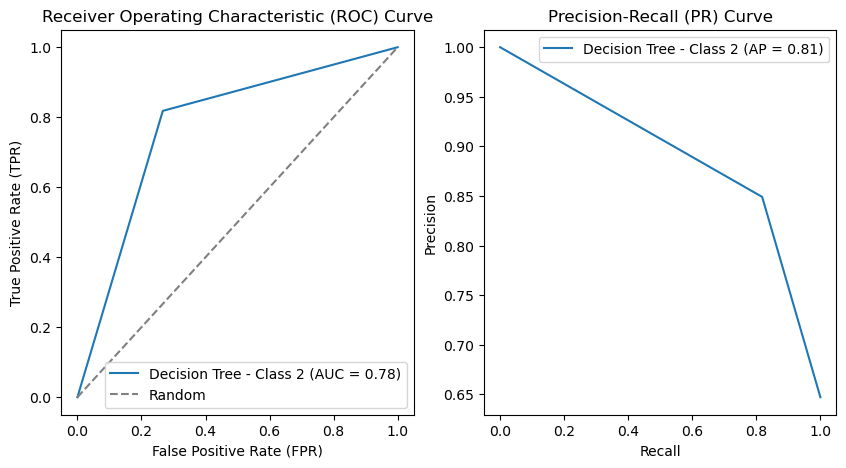

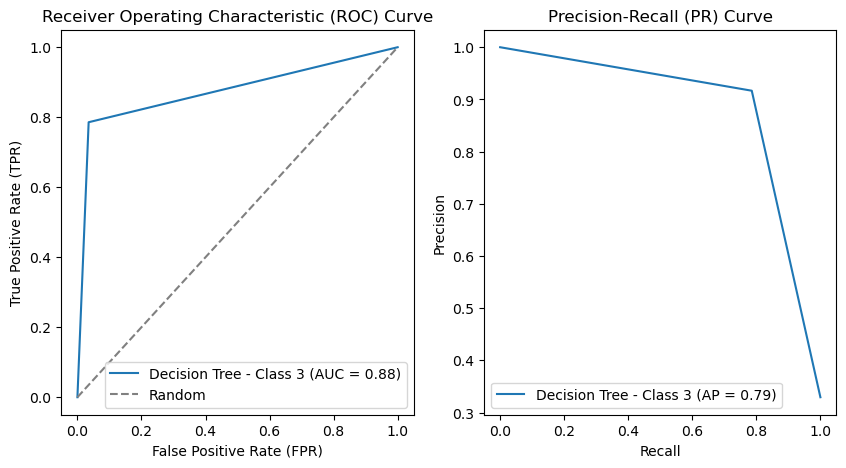

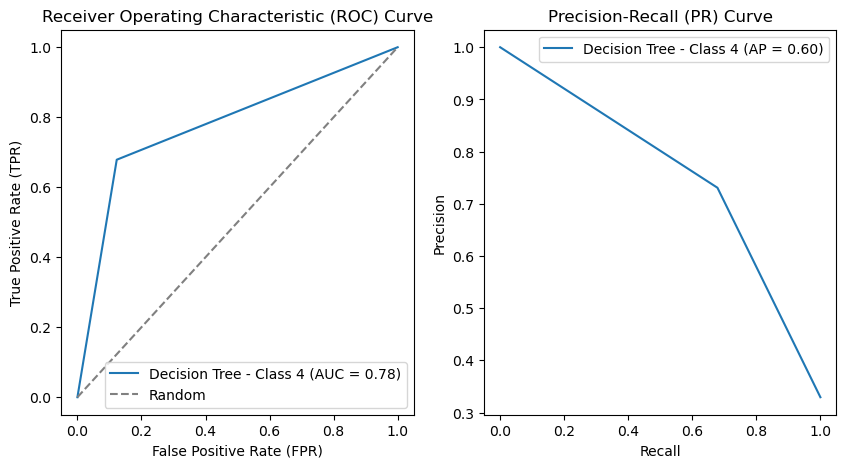

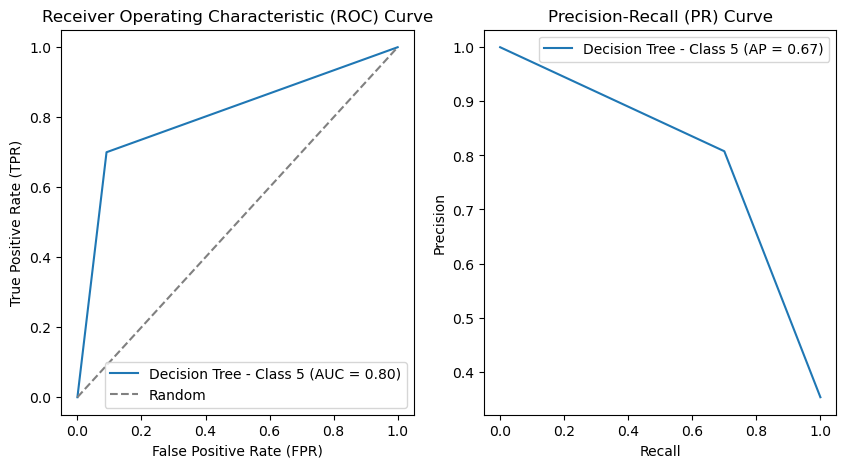

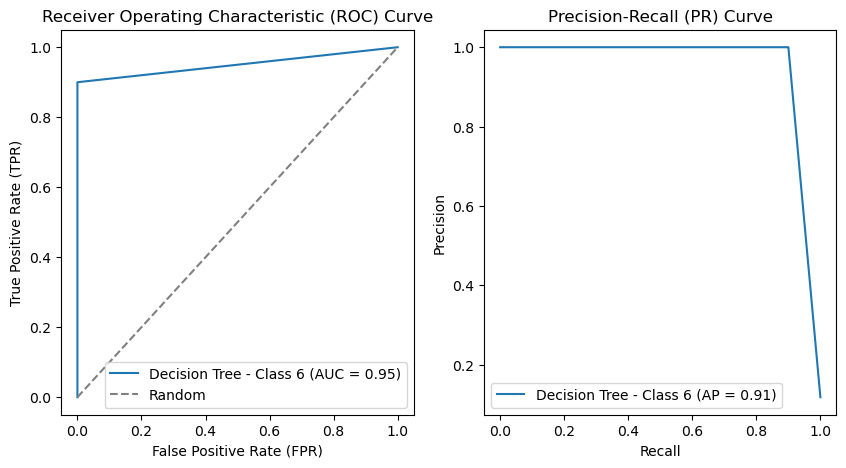

In [94]:
plot_roc_pr_curves(classifiers_tree, X_test, y_test, 'Decision Tree')

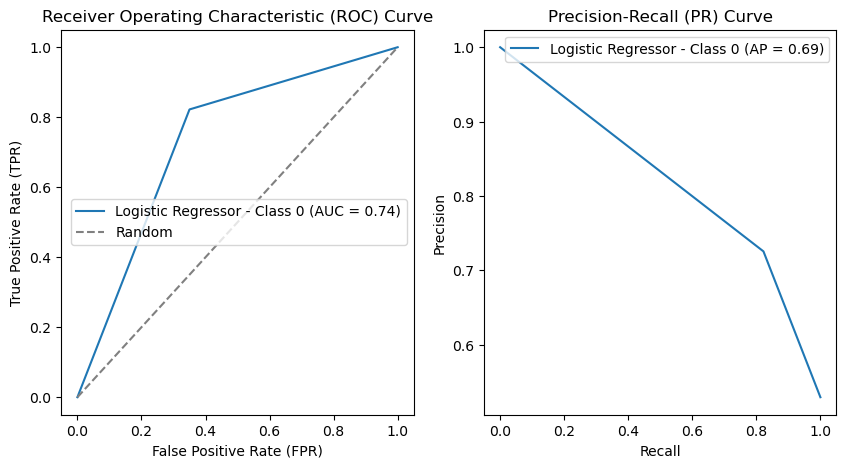

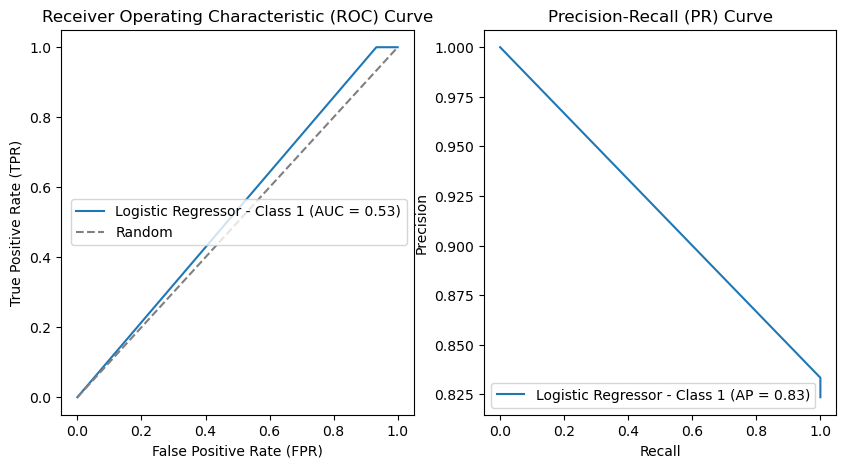

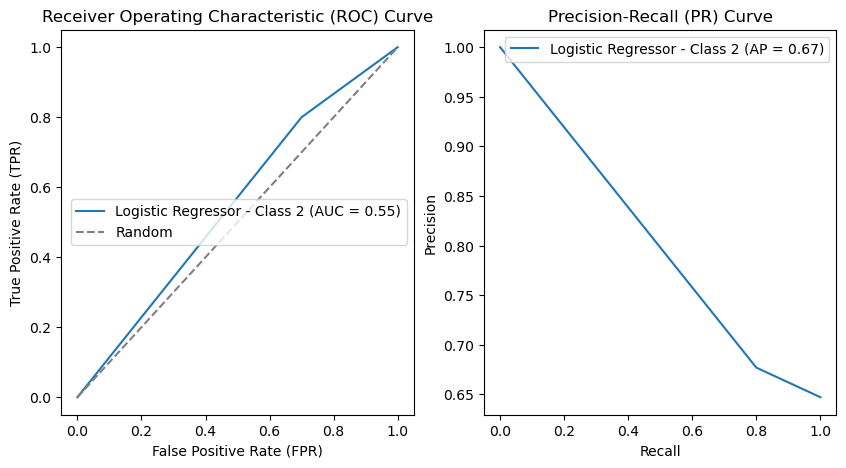

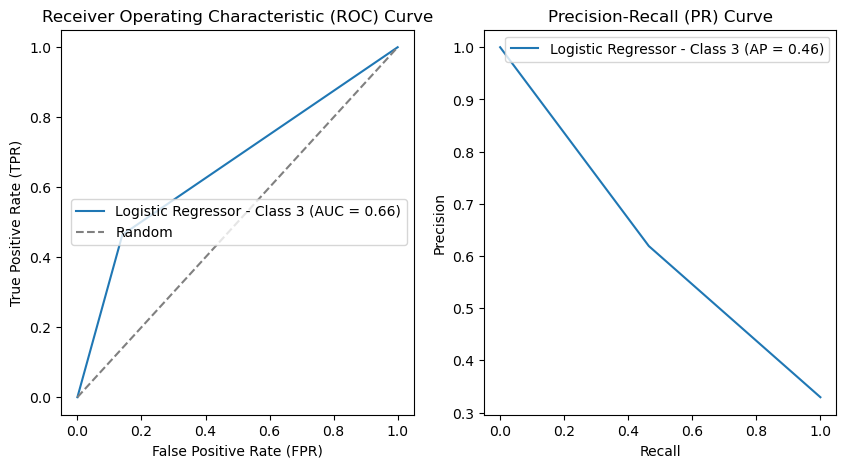

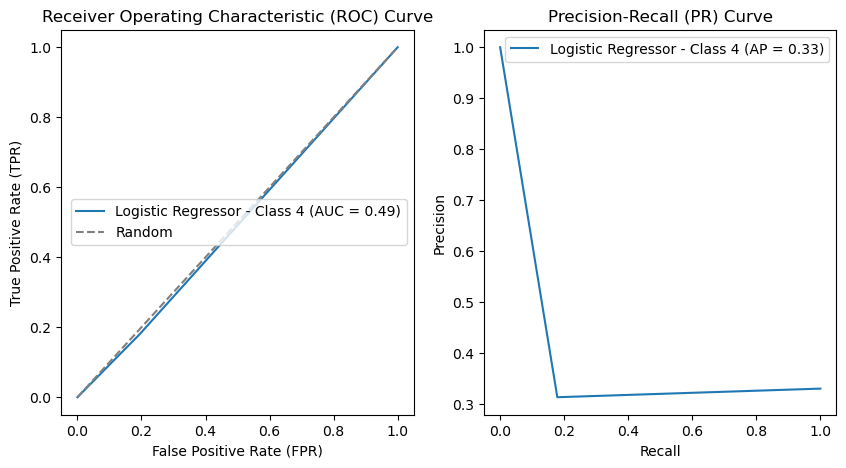

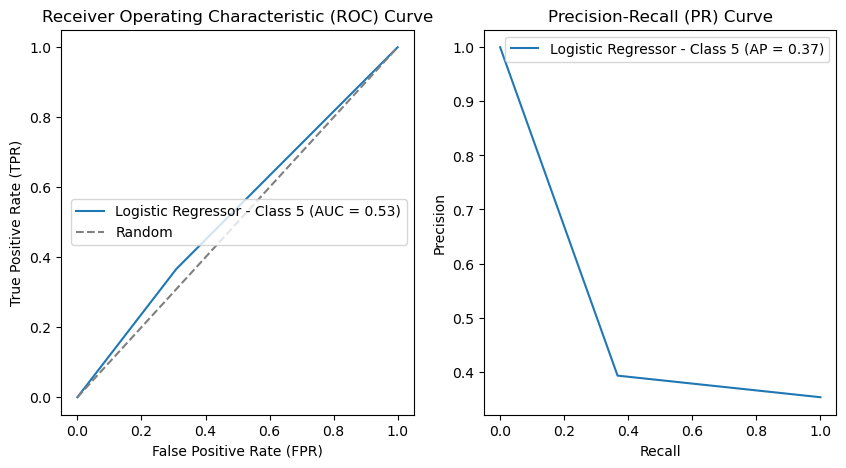

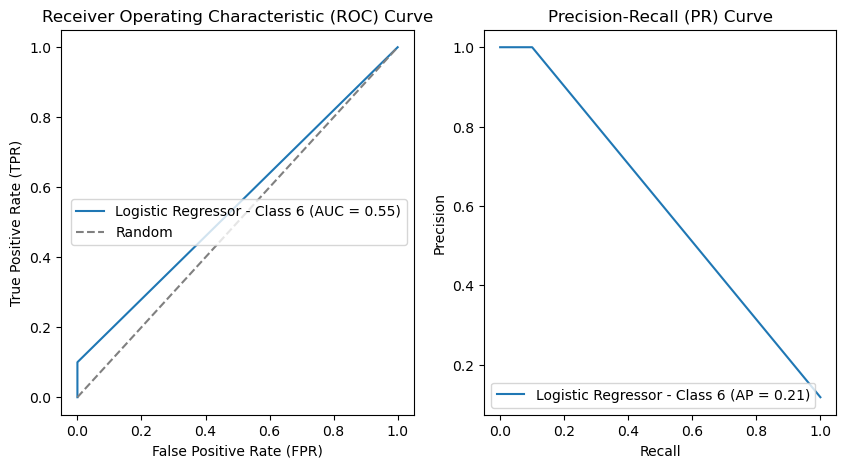

In [95]:
plot_roc_pr_curves(classifiers_log, X_test, y_test, 'Logistic Regressor')

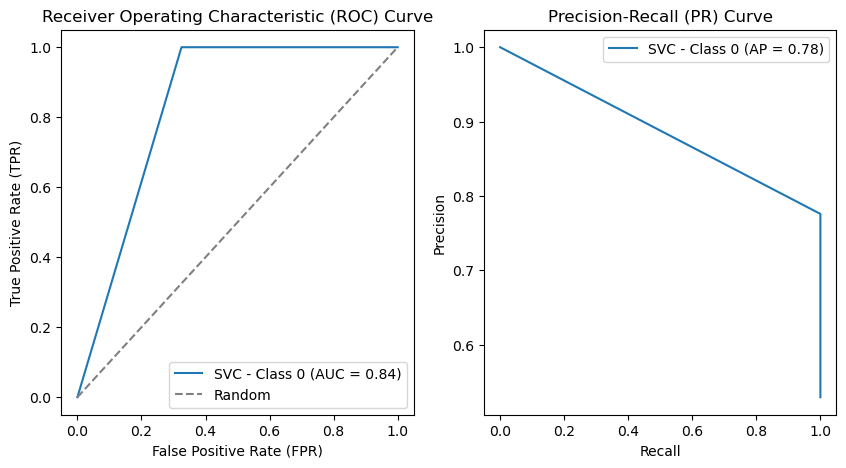

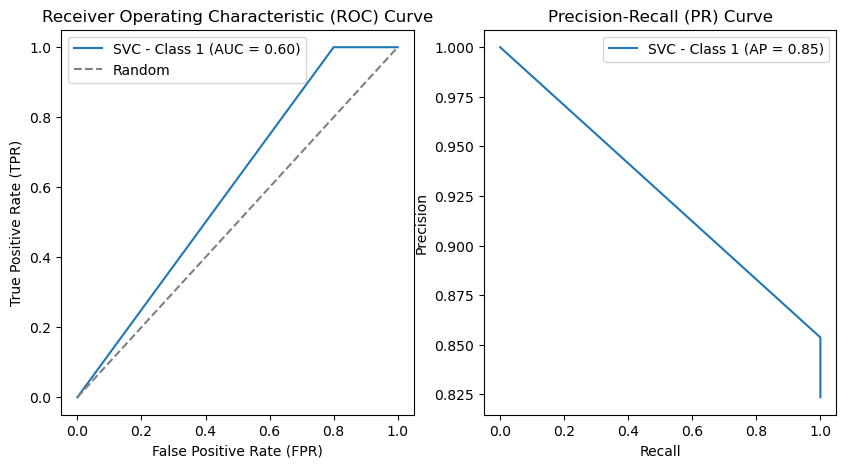

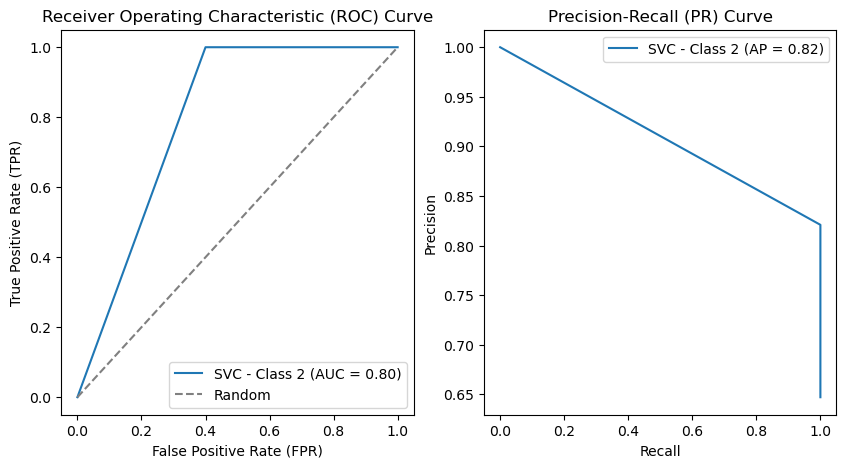

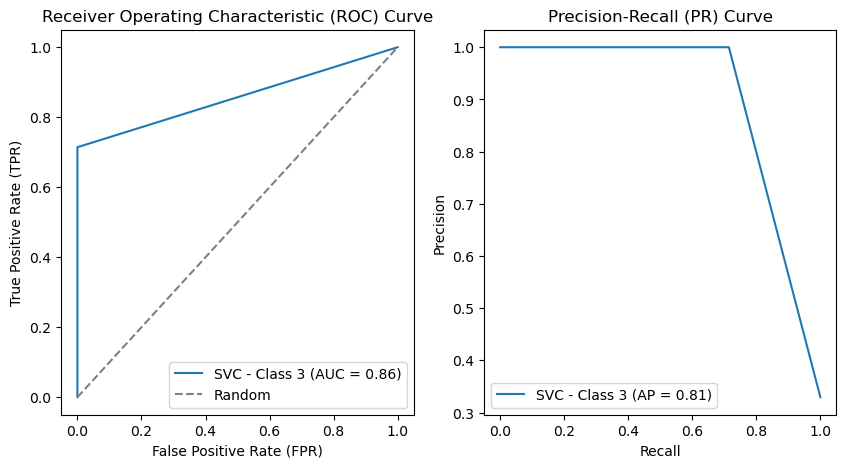

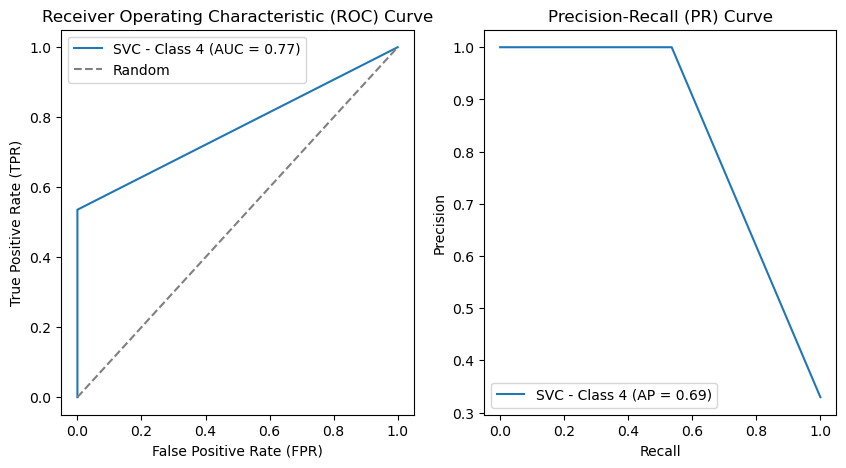

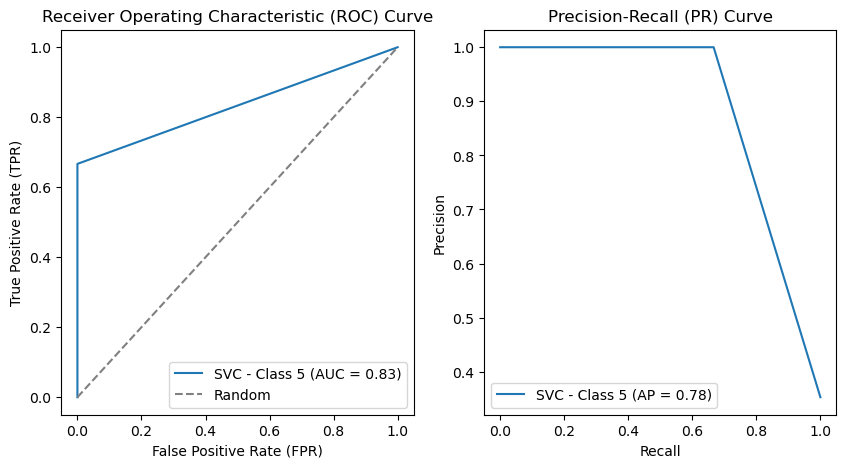

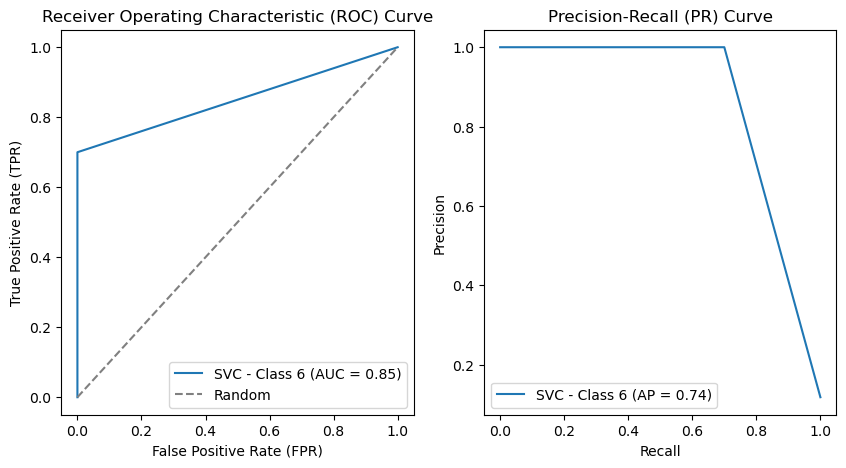

In [96]:
plot_roc_pr_curves(classifiers_svc, X_test, y_test, 'SVC')

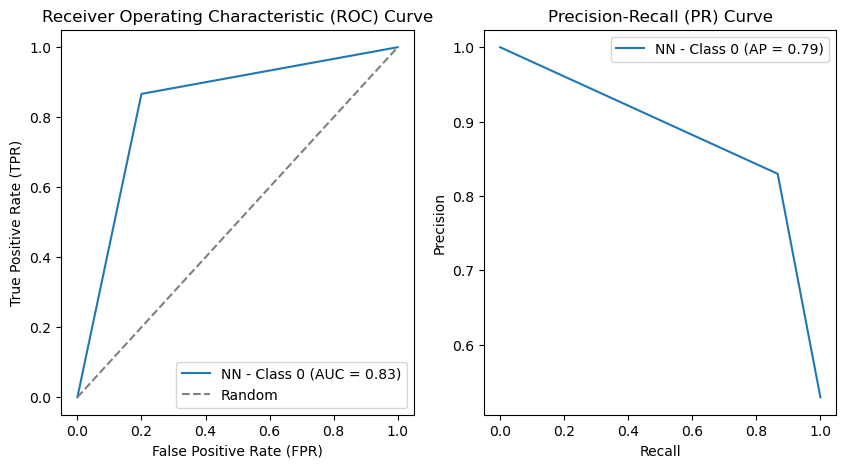

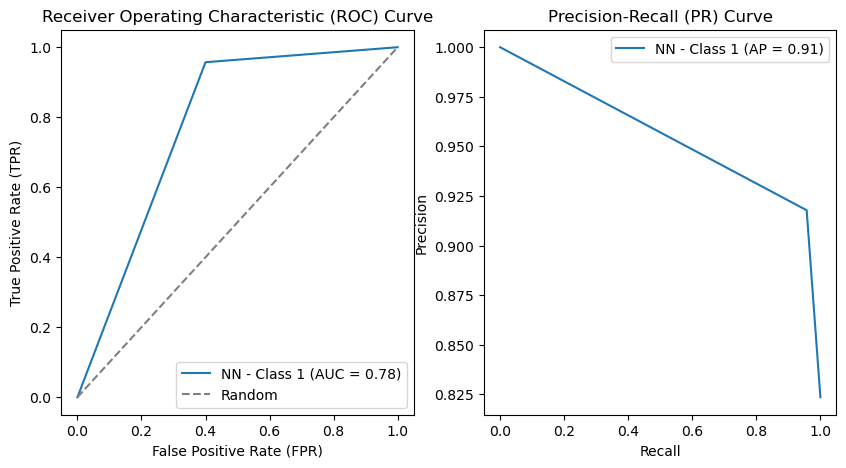

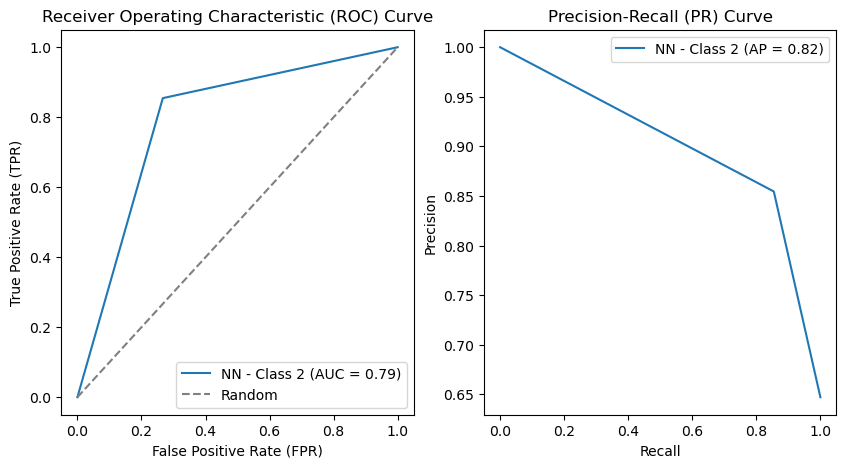

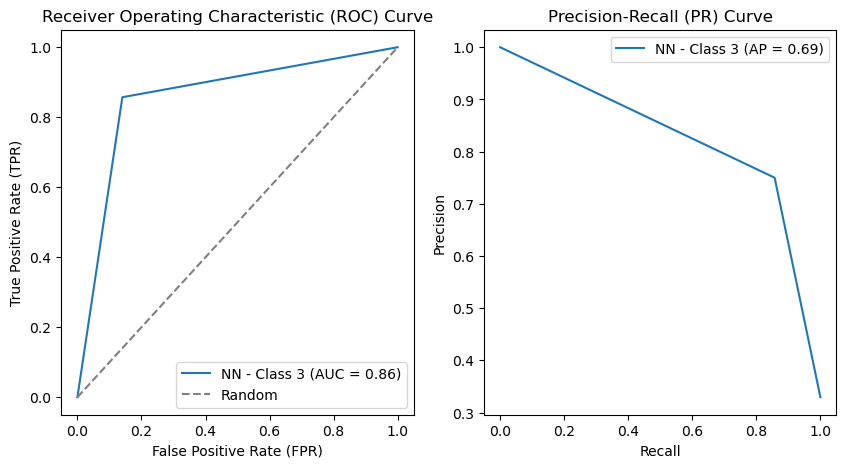

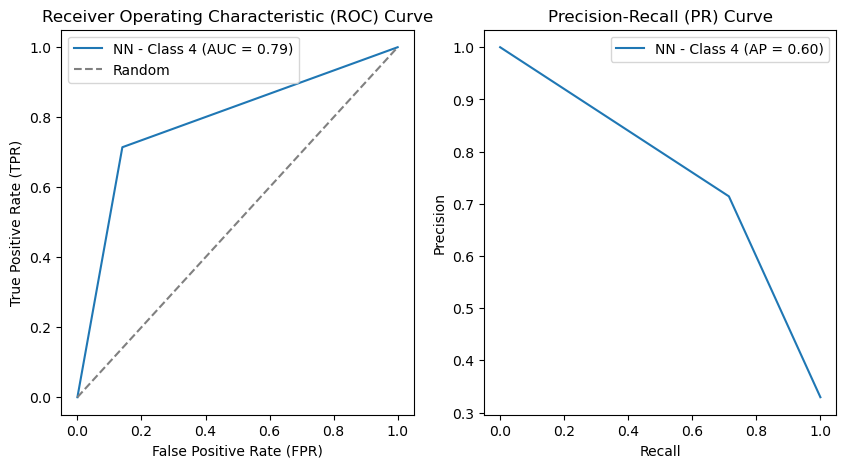

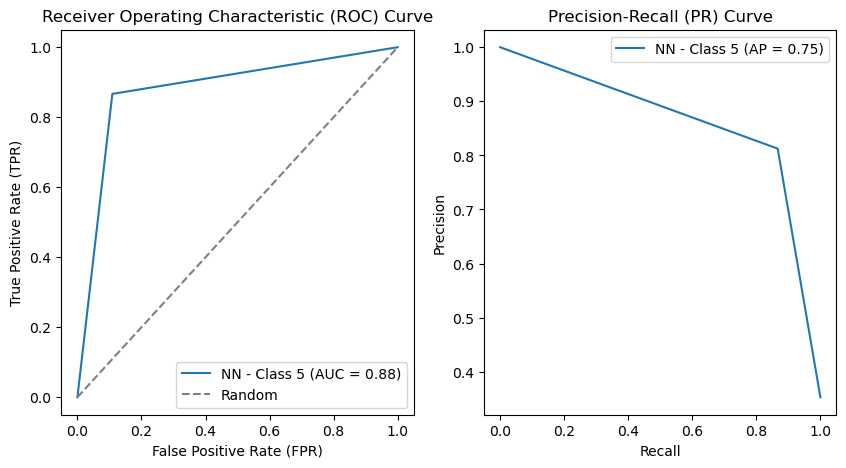

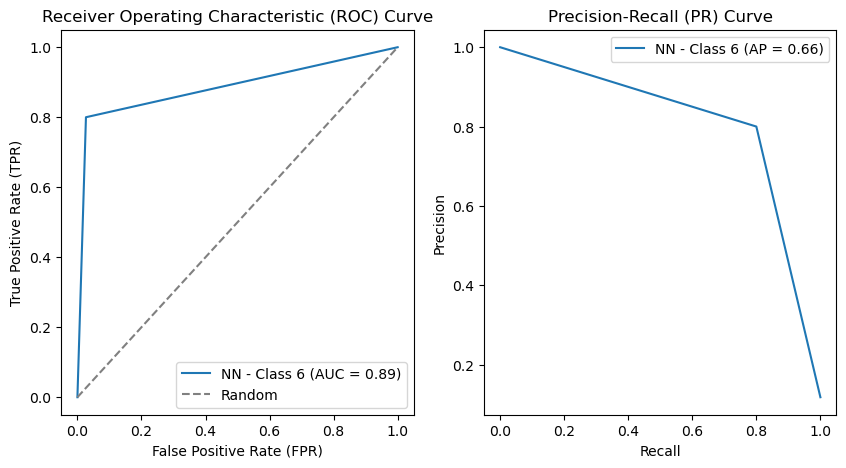

In [97]:
plot_roc_pr_curves(classifiers_nn, X_test, y_test, 'NN')

Each curve is plotted for each classifier and for each output classes.
We can see that the curves about the logistic regressor are far from the optimal, like we have seen before. While the curves about SVC and NN are the best.